In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import CPTAC.Endometrial as en

Welcome to the CPTAC data service package. Available datasets may be
viewed using CPTAC.list_data(). In order to access a specific data
set, import a CPTAC subfolder using either 'import CPTAC.Dataset' or
'from CPTAC import Dataset'.
******
Version: 0.2.7
******
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Acetylation Proteomics Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [3]:
# get prot and mutations
somatic_mutations = en.get_mutations()
proteomics = en.get_proteomics()

In [17]:
# declare gene and merge 
gene = 'KRAS'
gene_proteomics = en.compare_mutations(omics_data=proteomics, omics_gene=gene)
gene_proteomics.head()
gene_proteomics['Mutation'].unique()

array(['Wildtype_Tumor', 'Missense_Mutation', 'Wildtype_Normal'],
      dtype=object)

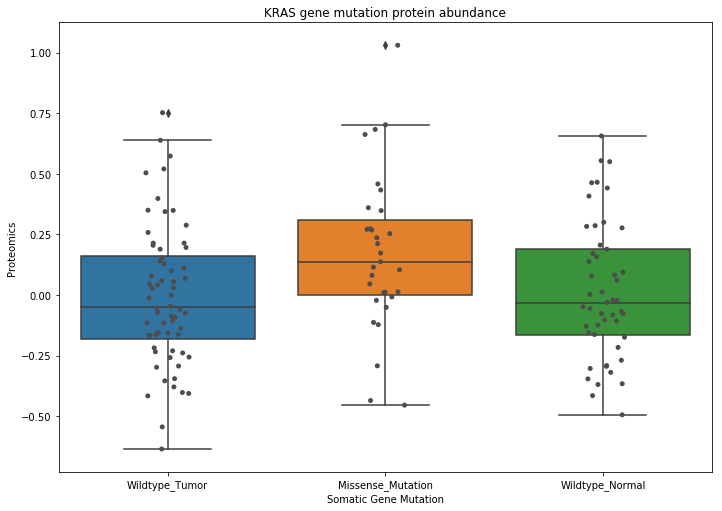

In [22]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims) #bigger plot displays Somatic Gene Mutation category without overlapping labels
somatic_boxplot = sns.boxplot(data=gene_proteomics, x="Mutation",y=gene, ax = ax) #order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("KRAS gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=gene_proteomics, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()